# Analisis Data Iklan

## Setup & Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("Data_Ads.csv")
df.head()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0


In [3]:
df.info()

df.isna().sum()

df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_date        4380 non-null   object 
 1   account_name        4380 non-null   object 
 2   campaign_objective  4380 non-null   object 
 3   impressions         4380 non-null   float64
 4   reach               4380 non-null   float64
 5   clicks              4380 non-null   float64
 6   link_clicks         4380 non-null   float64
 7   content_views       4380 non-null   float64
 8   add_to_cart         4380 non-null   float64
 9   purchase            4380 non-null   float64
 10  purchase_value      4380 non-null   float64
 11  amount_spent        4380 non-null   float64
dtypes: float64(9), object(3)
memory usage: 410.8+ KB


0

In [4]:
df['created_date'] = pd.to_datetime(df['created_date'])
df['month'] = df['created_date'].dt.to_period('M')

df['industry'] = df['account_name'].str.split(' - ').str[-1]

df['CTR'] = df['clicks'] / df['impressions']
df['ROAS'] = df['purchase_value'] / df['amount_spent']


In [5]:
df.head()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent,month,industry,CTR,ROAS
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0,2023-01,Fashion,0.101104,0.000000
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0,2023-01,Fashion,0.213882,0.937173
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0,2023-01,Beauty,0.078333,0.000000
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0,2023-01,Beauty,0.012400,0.800638
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0,2023-01,Fashion,0.036011,0.000000


## Exploratory Data Analysis (EDA)

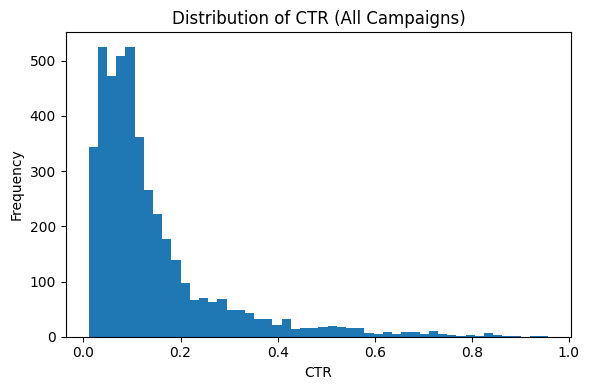

In [6]:
plt.figure(figsize=(6,4))
plt.hist(df['CTR'], bins=50)
plt.title("Distribution of CTR (All Campaigns)")
plt.xlabel("CTR")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

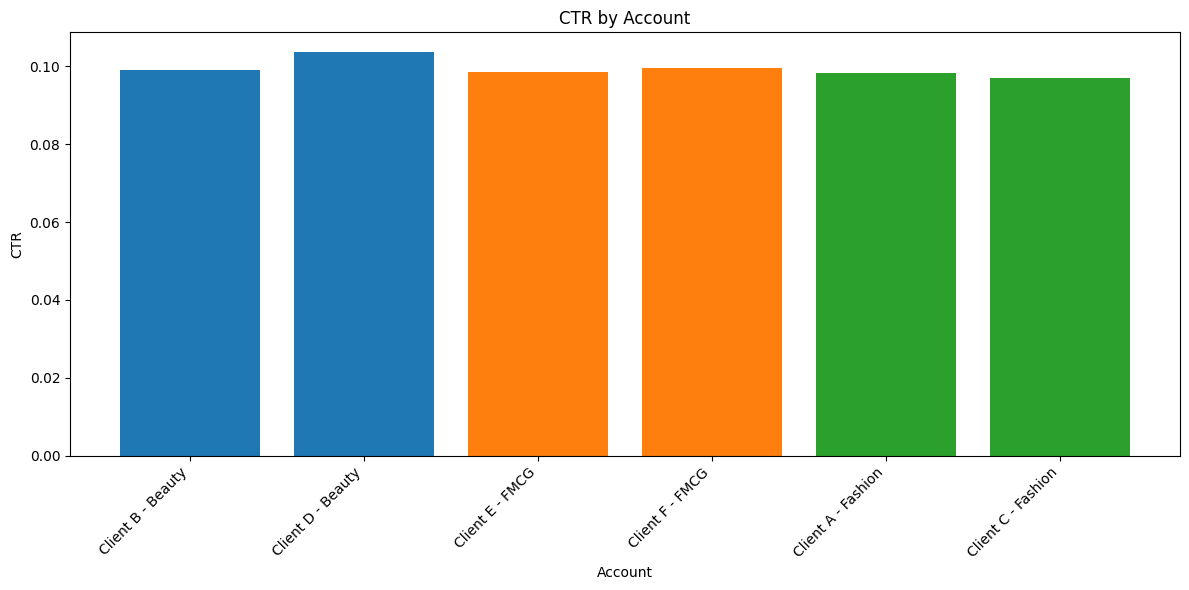

In [7]:
account_ctr = (
    df.groupby(['industry', 'account_name'])
      .agg({'clicks':'sum', 'impressions':'sum'})
      .reset_index()
)

account_ctr['CTR'] = account_ctr['clicks'] / account_ctr['impressions']
account_ctr['label'] = account_ctr['account_name']

plt.figure(figsize=(12,6))
plt.bar(
    account_ctr['label'],
    account_ctr['CTR'],
    color=account_ctr['industry'].map({
        'Beauty': '#1f77b4',
        'FMCG': '#ff7f0e',
        'Fashion': '#2ca02c'
    })
)
plt.title("CTR by Account")
plt.xlabel("Account")
plt.ylabel("CTR")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

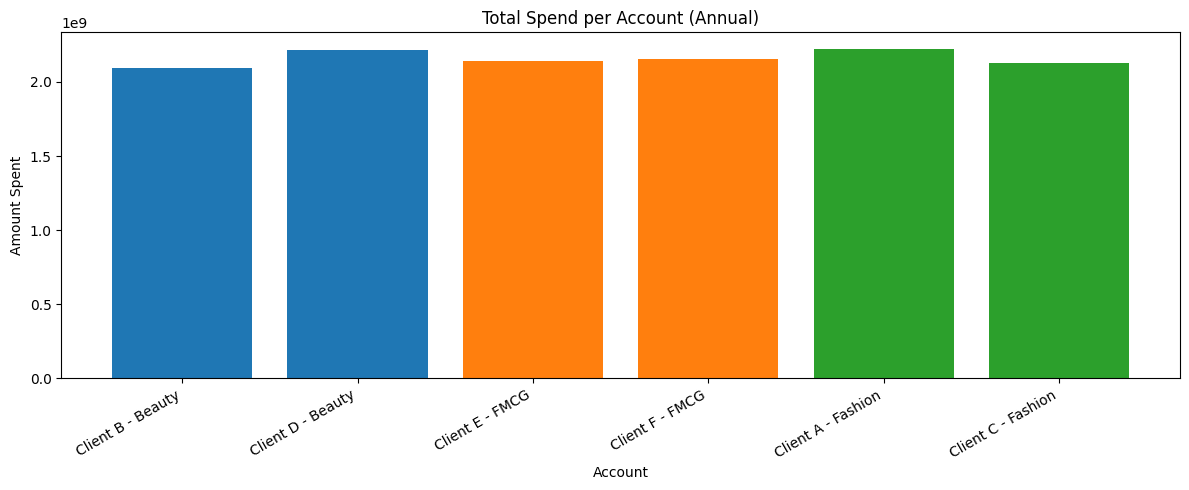

In [8]:
account_spend = (
    df.groupby(['industry', 'account_name'])['amount_spent']
      .sum()
      .reset_index()
)

account_spend['label'] = account_spend['account_name']

plt.figure(figsize=(12,5))
plt.bar(
    account_spend['label'],
    account_spend['amount_spent'],
    color=account_spend['industry'].map({
        'Beauty': '#1f77b4',
        'FMCG': '#ff7f0e',
        'Fashion': '#2ca02c'
    })
)
plt.title("Total Spend per Account (Annual)")
plt.xlabel("Account")
plt.ylabel("Amount Spent")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [9]:
spend_by_objective = (
    df.groupby('campaign_objective')['amount_spent']
      .sum()
)

spend_by_objective

campaign_objective
Sales      6.457171e+09
Traffic    6.495484e+09
Name: amount_spent, dtype: float64

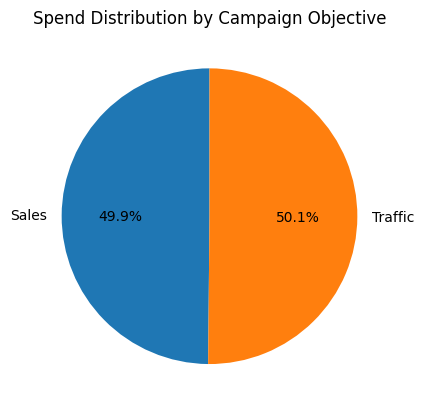

In [10]:
spend_by_objective.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Spend Distribution by Campaign Objective")
plt.ylabel("")
plt.show()

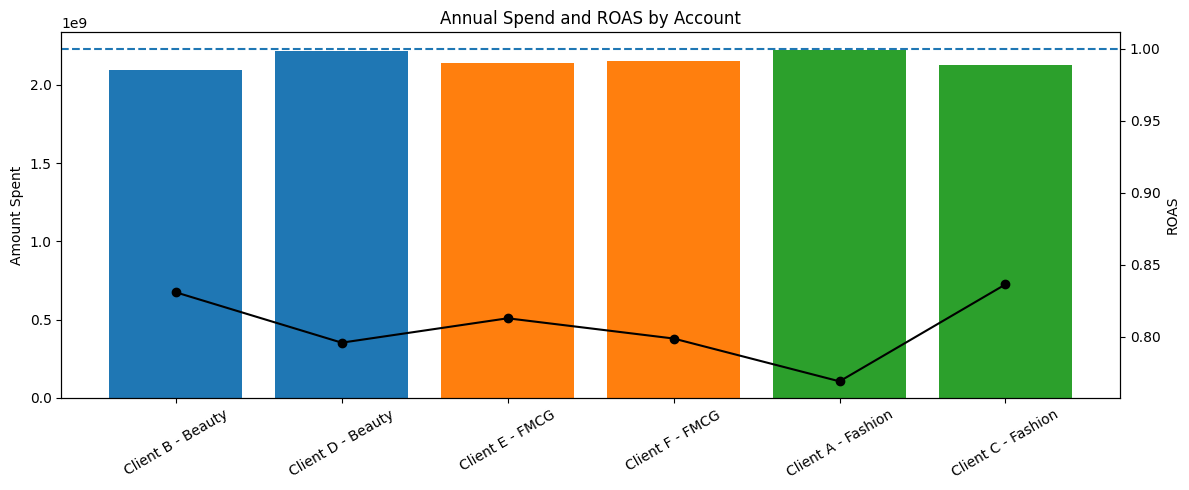

In [11]:
yearly_perf = (
    df.groupby(['industry', 'account_name'])
      .agg({
          'amount_spent':'sum',
          'purchase_value':'sum'
      })
      .reset_index()
)

yearly_perf['ROAS'] = yearly_perf['purchase_value'] / yearly_perf['amount_spent']
yearly_perf['label'] = yearly_perf['account_name']

fig, ax1 = plt.subplots(figsize=(12,5))

ax1.bar(
    yearly_perf['label'],
    yearly_perf['amount_spent'],
    color=yearly_perf['industry'].map({
        'Beauty': '#1f77b4',
        'FMCG': '#ff7f0e',
        'Fashion': '#2ca02c'
    })
)
ax1.set_ylabel("Amount Spent")
ax1.tick_params(axis='x', rotation=30)

ax2 = ax1.twinx()
ax2.plot(yearly_perf['label'], yearly_perf['ROAS'], color='black', marker='o')
ax2.axhline(1, linestyle='--')
ax2.set_ylabel("ROAS")

plt.title("Annual Spend and ROAS by Account")
plt.tight_layout()
plt.show()

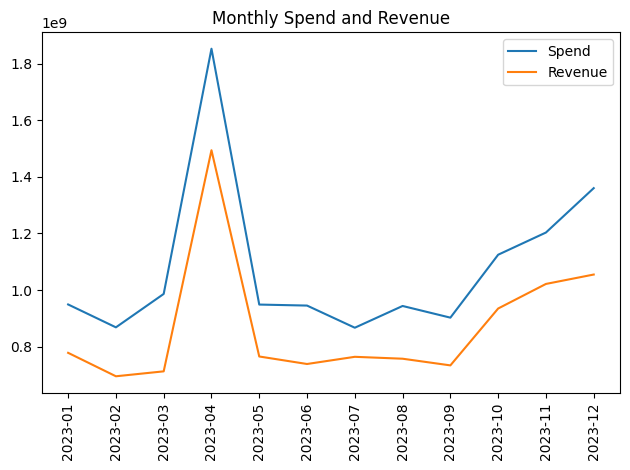

In [12]:
monthly_perf = (
    df.groupby('month')
      .agg({
          'amount_spent':'sum',
          'purchase_value':'sum'
      })
      .reset_index()
)

plt.plot(monthly_perf['month'].astype(str), monthly_perf['amount_spent'], label='Spend')
plt.plot(monthly_perf['month'].astype(str), monthly_perf['purchase_value'], label='Revenue')
plt.xticks(rotation=90)
plt.title("Monthly Spend and Revenue")
plt.legend()
plt.tight_layout()
plt.show()

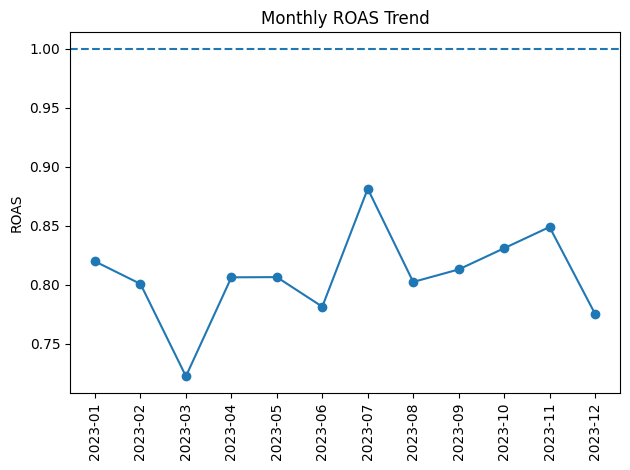

In [13]:
monthly_perf['ROAS'] = monthly_perf['purchase_value'] / monthly_perf['amount_spent']

plt.plot(monthly_perf['month'].astype(str), monthly_perf['ROAS'], marker='o')
plt.axhline(1, linestyle='--')
plt.xticks(rotation=90)
plt.title("Monthly ROAS Trend")
plt.ylabel("ROAS")
plt.tight_layout()
plt.show()

In [14]:
monthly_account = (
    df.groupby(['month', 'account_name'])
      .agg({
          'purchase_value': 'sum',
          'amount_spent': 'sum'
      })
      .reset_index()
)

monthly_account['ROAS'] = (
    monthly_account['purchase_value'] /
    monthly_account['amount_spent']
)

monthly_account['month_str'] = monthly_account['month'].astype(str)

monthly_account.head()

,month,account_name,purchase_value,amount_spent,ROAS,month_str
0,2023-01,Client A - Fashion,145129834.0,152326801.0,0.952753,2023-01
1,2023-01,Client B - Beauty,116662716.0,162765617.0,0.716753,2023-01
2,2023-01,Client C - Fashion,119247679.0,159091331.0,0.749555,2023-01
3,2023-01,Client D - Beauty,112791945.0,156835960.0,0.719171,2023-01
4,2023-01,Client E - FMCG,145120004.0,153838847.0,0.943325,2023-01


In [15]:
fig = px.line(
    monthly_account,
    x='month_str',
    y='ROAS',
    color='account_name',
    markers=True,
    title='Monthly ROAS Trend per Account'
)

fig.add_hline(
    y=1,
    line_dash='dash',
    annotation_text='ROAS = 1',
    annotation_position='top left'
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='ROAS',
    legend_title='Account',
    hovermode='x unified'
)

fig.show()

In [16]:
funnel = df[['impressions', 'clicks', 'purchase']].sum()
funnel

impressions    2.851285e+09
clicks         2.832034e+08
purchase       1.313542e+06
dtype: float64

In [17]:
ctr = funnel['clicks'] / funnel['impressions']
click_to_purchase = funnel['purchase'] / funnel['clicks']

ctr, click_to_purchase

(0.09932480453464518, 0.004638158123371128)

## **Insight Utama dari Data**

---

### **1. Kualitas Traffic Sangat Tinggi (Creative Excellence)**

**Apa yang terlihat di data:**
- **CTR Overall mencapai 9,93%** (±283 juta klik dari ±2,85 miliar impresi).
- Tidak ada perbedaan minat klik yang signifikan antara campaign **Traffic (9,98%)** dan **Sales (9,88%)**.

**Artinya:**
Materi kreatif dan penargetan audiens sudah sangat relevan. Permasalahan utama agensi **bukan pada kemampuan menarik perhatian**, melainkan pada bagaimana perhatian tersebut dikonversi menjadi revenue.

**Apa yang sebaiknya dilakukan:**
- Pertahankan kualitas kreatif dan strategi penargetan yang ada.
- Hindari perubahan besar pada pesan iklan karena audiens sudah merespons dengan baik.

---

### **2. Ketimpangan Alokasi Budget vs Sumber Revenue**

**Apa yang terlihat di data:**
- Alokasi budget terbagi hampir merata antara Traffic dan Sales.
- **100% revenue (±Rp10,45 Miliar)** hanya tercatat dari campaign dengan objective **Sales**.
- **ROAS Sales = 1,62**, sementara **ROAS Overall = 0,81** akibat beban biaya dari campaign Traffic.

**Artinya:**
Campaign Sales berfungsi sebagai *engine revenue*, namun efisiensinya tereduksi oleh alokasi budget besar pada Traffic yang tidak menghasilkan transaksi langsung.

**Apa yang sebaiknya dilakukan:**
- Lakukan **rebalancing budget** dengan mengarahkan mayoritas anggaran ke Sales.
- Pertahankan Traffic dalam porsi terbatas (±20%) sebagai pendukung top-of-funnel dan retargeting.

---

### **3. Penurunan Efisiensi pada Skala Besar (Diminishing Returns)**

**Apa yang terlihat di data:**
- Pada Desember, *amount spent* meningkat tajam tanpa kenaikan *purchase value* yang sebanding.
- Industri FMCG mengalami penurunan ROAS signifikan hingga **0,67** di periode akhir tahun.

**Artinya:**
Scaling budget secara agresif pada periode kompetisi tinggi tidak selalu meningkatkan profitabilitas dan justru berpotensi menurunkan efisiensi.

**Apa yang sebaiknya dilakukan:**
- Terapkan **budget capping** pada akun yang menunjukkan penurunan efisiensi saat scaling.
- Alihkan budget ke akun yang lebih stabil dan konsisten performanya.

---

### **4. Eksekusi Akun Lebih Dominan daripada Tren Industri**

**Apa yang terlihat di data:**
- Meskipun industri Beauty memiliki ROAS agregat tertinggi, terdapat akun dari industri lain (mis. Fashion) yang menunjukkan performa revenue lebih stabil.
- Variasi performa antar akun dalam industri yang sama cukup kontras.

**Artinya:**
Performa iklan lebih dipengaruhi oleh kualitas eksekusi campaign di level akun dibandingkan faktor industri semata.

**Apa yang sebaiknya dilakukan:**
- Lakukan evaluasi berbasis **individual account performance**, bukan hanya rata-rata industri.
- Prioritaskan scaling pada akun dengan performa yang telah terbukti stabil.

---

### **5. Bottleneck Utama: Konversi Pasca-Klik**

**Apa yang terlihat di data:**
- **CTR tinggi (±9,93%)**, namun **click-to-purchase rate hanya ±0,46%**.
- Dari ±283 juta klik, hanya tercipta ±1,31 juta pembelian.

**Artinya:**
Terjadi penurunan signifikan setelah tahap klik. Audiens tertarik dengan iklan, namun menghadapi hambatan pada proses pembelian (landing page, harga, atau checkout).

**Apa yang sebaiknya dilakukan:**
- Alihkan fokus dari penambahan traffic ke **optimasi konversi (CRO)**.
- Lakukan audit pengalaman pengguna pada halaman produk dan proses checkout untuk mengurangi friksi.

---

### **Ringkasan Singkat**

Secara teknis, performa iklan dalam menarik perhatian audiens sudah sangat kuat. Namun, secara bisnis, efisiensi masih tertekan oleh alokasi budget yang belum optimal dan rendahnya konversi pasca-klik. Dengan memprioritaskan campaign Sales, menjaga Traffic dalam porsi terkontrol, serta mengoptimalkan funnel konversi, agensi memiliki peluang untuk meningkatkan ROAS hingga melampaui titik impas (**ROAS > 1**) tanpa menambah total anggaran iklan.

---

## Rekomendasi Bisnis Utama

1. **Rebalancing Strategi Funnel (Fokus 80/20)**
Mengingat campaign *Sales* memiliki ROAS 1,62, alokasikan **80% budget** ke objektif ini untuk mengamankan revenue. Batasi budget *Traffic* maksimal 20% dan fokuskan hanya untuk mengisi ulang kolam audiens baru (*Audience Seeding*) agar campaign *Sales* tidak kehabisan target di masa depan.
2. **Optimasi Konversi (CRO) sebagai Prioritas Utama**
Jangan menambah budget iklan sebelum angka **CVR 0,46%** ini membaik. Agensi harus merekomendasikan klien untuk mengaudit *Landing Page*, menyederhanakan proses *Checkout*, atau memperbaiki kecepatan *loading* situs. Peningkatan CVR sebesar 0,1% saja akan memberikan dampak profit yang jauh lebih besar daripada menambah jutaan klik baru.
3. **Scaling Berbasis Akun dan Momentum (Dynamic Spending)**
Lakukan *Upscaling* budget secara agresif hanya pada akun yang terbukti stabil seperti **Client C (Fashion)**. Sebaliknya, lakukan *Downscaling* (penghematan) pada akun yang mengalami penurunan efisiensi di periode tertentu (seperti FMCG di bulan Desember) untuk melindungi profit margin keseluruhan.

---

# **LAPORAN ANALISIS PERFORMA DIGITAL ADS**

**Role:** Senior Data Analyst
**Konteks:** Evaluasi Strategis Portofolio Klien Tahun 2023

---

## **1. BUSINESS UNDERSTANDING**

### **Konteks Bisnis**

Agensi mengelola anggaran iklan digital untuk **6 akun klien** lintas industri (**Beauty, Fashion, FMCG**).
Hasil agregat menunjukkan **ROAS keseluruhan sebesar 0,81**, yang berarti pendapatan langsung dari iklan **belum menutup total biaya iklan** yang dikeluarkan.

Namun, data juga menunjukkan bahwa sebagian campaign mampu menghasilkan revenue secara efisien. Oleh karena itu, permasalahan utama tidak terletak pada performa iklan secara keseluruhan, melainkan pada **strategi alokasi budget antar objective dan efisiensi konversi**.

### **Tujuan Analisis**

* Mengevaluasi performa iklan berdasarkan metrik utama (CTR dan ROAS).
* Menganalisis tren performa dari waktu ke waktu untuk mengidentifikasi pola efisiensi.
* Menyusun rekomendasi strategis berbasis data untuk meningkatkan profitabilitas tanpa menambah total anggaran iklan.

---

## **2. DATA & METRIC OVERVIEW**

### **Struktur Dataset**

* Total data: **4.380 baris** (harian)
* Periode: **Januari – Desember 2023**
* Jumlah akun: **6 klien**
* Industri: **Beauty, Fashion, FMCG**
* Setiap baris merepresentasikan **1 campaign per hari per akun**

### **Kualitas Data**

* Tidak ditemukan *missing value* atau duplikasi
* Revenue hanya tercatat pada campaign dengan objective Sales
* Struktur funnel konsisten dan siap dianalisis

---

## **3. PERFORMANCE METRICS ANALYSIS**

### **Click-Through Rate (CTR)**

* **CTR Overall:** **9,93%**
* **CTR Traffic:** **9,98%**
* **CTR Sales:** **9,88%**

**Interpretasi:**
Tidak terdapat perbedaan signifikan dalam ketertarikan audiens untuk mengklik iklan antara campaign Traffic dan Sales. Hal ini menunjukkan bahwa performa kreatif dan penargetan iklan telah berjalan sangat efektif.

---

### **Revenue & ROAS**

* **Total Purchase Value:** **Rp 10.453.486.353**
* **ROAS Sales:** **1,62**
* **ROAS Overall:** **0,81**
* **ROAS Traffic:** **0** (tidak menghasilkan transaksi langsung)

**Interpretasi:**
Campaign Sales terbukti mampu menghasilkan revenue secara langsung. Namun, kontribusi positif tersebut tereduksi oleh alokasi budget yang signifikan pada campaign Traffic yang tidak mencatat omzet.

---

## **4. TREND & TIME SERIES ANALYSIS (MONTHLY)**

### **Pola Umum Bulanan**

* **Jan–Feb:** Spend relatif tinggi, revenue belum stabil → efisiensi rendah
* **Mar:** Spend meningkat tanpa kenaikan revenue proporsional
* **Apr:** Terjadi peningkatan revenue signifikan seiring periode aktivitas belanja nasional
* **Mei–Jun:** Spend dan revenue relatif stabil
* **Jul–Aug:** Efisiensi cenderung stagnan
* **Sep–Okt:** Spend meningkat, revenue belum mengikuti secara seimbang
* **Nov:** Revenue tertinggi sepanjang tahun, efisiensi membaik
* **Des:** Spend meningkat tajam, namun kenaikan revenue terbatas, terutama pada industri FMCG

### **Kesimpulan Time Series**

Kenaikan biaya iklan tidak selalu menghasilkan kenaikan revenue yang sebanding. Pada periode tertentu, terutama saat spend agresif, terjadi penurunan efisiensi yang tercermin pada ROAS.

---

## **5. INDUSTRY & ACCOUNT PERFORMANCE**

### **Performa Industri**

* **Beauty:** Omzet dan ROAS agregat tertinggi
* **Fashion:** Stabil dengan efisiensi menengah
* **FMCG:** Paling fluktuatif, terutama di akhir tahun

### **Performa Akun**

* **Client C – Fashion** menghasilkan revenue tertinggi dengan stabilitas ROAS yang baik pada campaign Sales

**Interpretasi:**
Perbedaan performa antar akun dalam industri yang sama lebih signifikan dibandingkan perbedaan antar industri, menunjukkan bahwa kualitas eksekusi campaign di level akun merupakan faktor penentu utama.

---

## **6. FUNNEL & BOTTLENECK ANALYSIS**

### **Funnel Dasar**

Impressions → Clicks → Purchase

### **Temuan Utama**

* CTR mendekati **10%** menunjukkan awareness dan interest sangat kuat
* Rasio konversi dari clicks ke purchase relatif rendah

### **Bottleneck**

* Campaign Traffic menghasilkan volume klik besar namun tidak menghasilkan transaksi
* Campaign Sales menghasilkan revenue, namun skalanya dibatasi oleh alokasi budget

**Kesimpulan Funnel:**
Hambatan utama berada pada **tahap konversi pasca-klik dan strategi distribusi budget**, bukan pada volume traffic.

---

## **7. KEY BUSINESS INSIGHTS**

1. CTR tinggi tidak menjamin profitabilitas bisnis.
2. Campaign Sales merupakan satu-satunya sumber revenue langsung.
3. Alokasi budget yang tidak seimbang menekan ROAS keseluruhan.
4. Scaling budget tanpa kontrol efisiensi menurunkan ROAS.
5. Eksekusi campaign di level akun lebih menentukan hasil dibandingkan industri.

---

## **8. STRATEGIC BUSINESS RECOMMENDATIONS**

### **1. Rebalancing Campaign Portfolio**

* **Dasar Data:** ROAS Sales (1,62) jauh lebih tinggi dibandingkan kontribusi Traffic.
* **Strategi:** Mengalokasikan mayoritas budget ke campaign Sales dan mempertahankan porsi terbatas (~20%) untuk Traffic.
* **Alasan:** Data menunjukkan Traffic efektif menarik audiens baru (CTR ~9,98%) yang berperan menjaga keberlanjutan performa Sales dalam jangka menengah.

---

### **2. Strategi Efisiensi untuk Klien FMCG**

* **Dasar Data:** ROAS FMCG turun signifikan pada bulan Desember.
* **Strategi:** Mengurangi budget pada periode dengan efisiensi rendah dan mengalokasikannya ke periode yang lebih stabil.
* **Tujuan:** Menjaga margin profit klien.

---

### **3. Upscaling Berbasis Performa untuk Akun Berkinerja Tinggi**

* **Dasar Data:** Client C – Fashion menunjukkan performa stabil dan efisien.
* **Strategi:** Menambah budget secara terukur pada akun dengan efisiensi terbukti.
* **Tujuan:** Memaksimalkan revenue dengan risiko minimal.

---

### **4. Optimasi Conversion Funnel**

* **Dasar Data:** CTR tinggi tidak diikuti rasio purchase yang sebanding.
* **Strategi:** Audit landing page, halaman produk, dan proses checkout.
* **Tujuan:** Meningkatkan konversi tanpa meningkatkan biaya traffic.

---

## **9. KESIMPULAN AKHIR**

Data menunjukkan bahwa sistem iklan telah berhasil menarik audiens secara efektif, namun belum dimonetisasi secara optimal akibat strategi alokasi budget dan konversi yang kurang efisien.
Dengan memprioritaskan campaign yang terbukti menghasilkan revenue, mempertahankan Traffic sebagai pendukung funnel secara terkontrol, serta menerapkan scaling berbasis efisiensi, **ROAS keseluruhan berpotensi ditingkatkan hingga melampaui titik impas (ROAS > 1)** tanpa memerlukan tambahan anggaran iklan.

---